In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as mat
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('DS1_C6_S4_Credit_Data_Hackathon.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [3]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [4]:
df.shape

(100000, 24)

In [5]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [7]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                
        if df[column].nunique() < 30:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [8]:
def info_of_cat(col):
    print(f'Unique values in {col} are: {df[col].unique()}')
    print(f'Mode values in {col} are: {df[col].mode()[0]}')
    print(f'Missing values in {col}: are {df[col].isnull().sum()}') 

In [9]:
def info_of_numerical(col):
    print(f'mean of the values in {col} are: {df[col].mean()}')
    print(f'median of the value in {col} are: {df[col].median()}')
    print(f'mode of the values in {col} are: {df[col].mode()[0]}')
    print(f'missing values in {col} are: {df[col].isnull().sum()}')

In [11]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [12]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


# Univarient

# Target-wise customers.

In [14]:
info_of_cat('TARGET')

Unique values in TARGET are: [1 0]
Mode values in TARGET are: 0
Missing values in TARGET: are 0


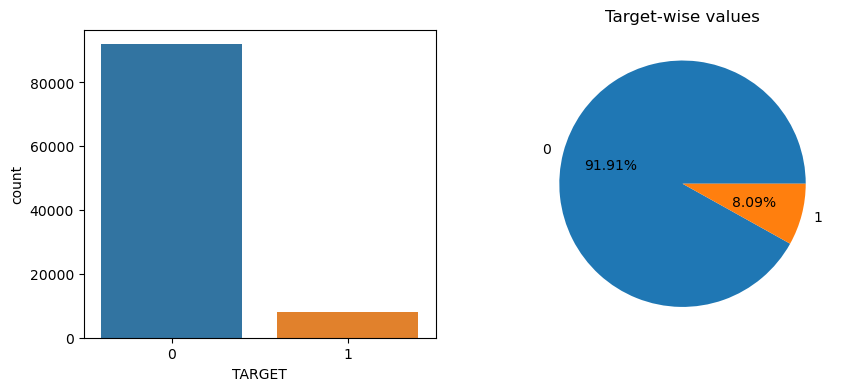

In [18]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
a=df['TARGET'].value_counts()
b=a.index
sb.countplot(data=df,x='TARGET',ax=ax[0])
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title('Target-wise values');

conclusion:-Approx 92% of total customers did'nt faced any issue with the payment

# Name-Contract-type of customers

In [11]:
info_of_cat('NAME_CONTRACT_TYPE')

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode values in NAME_CONTRACT_TYPE are: Cash loans
Missing values in NAME_CONTRACT_TYPE: are 0


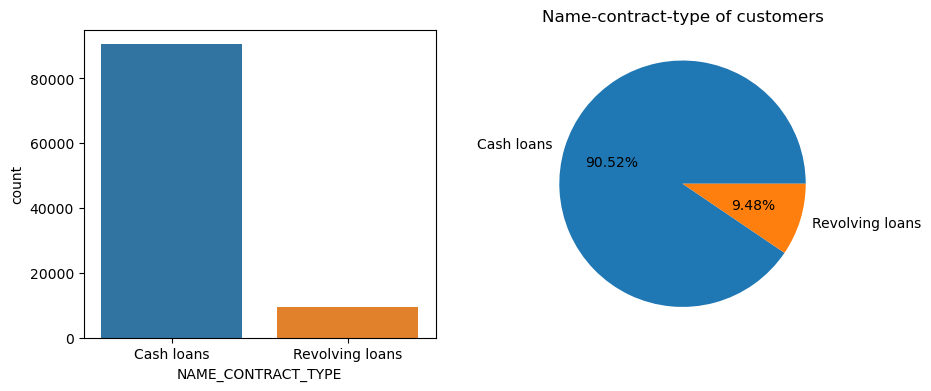

In [19]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
a=df['NAME_CONTRACT_TYPE'].value_counts()
b=a.index
sb.countplot(data=df,x='NAME_CONTRACT_TYPE',ax=ax[0])
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title('Name-contract-type of customers');

conclusion:-90.52% of total customers are having cash loans.

# Gender-wise customers

In [10]:
info_of_cat('GENDER')

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode values in GENDER are: F
Missing values in GENDER: are 0


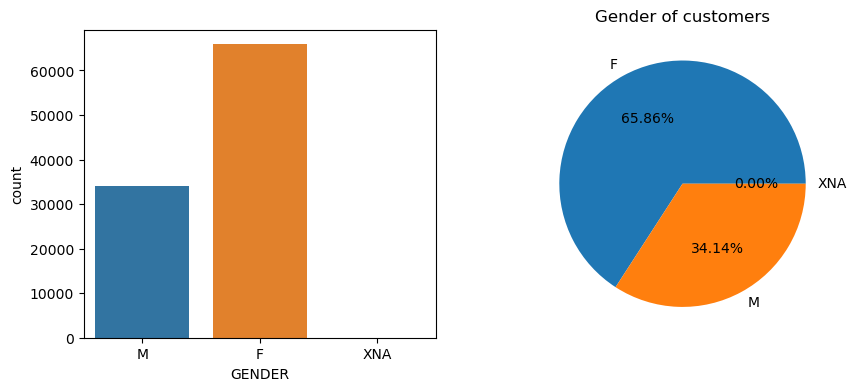

In [43]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
a=df['GENDER'].value_counts()
b=a.index
sb.countplot(data=df,x='GENDER',ax=ax[0])
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title('Gender of customers');

conclusion:-66% of total customers are Females.

# Car-wise customers

In [15]:
info_of_cat('Car')

Unique values in Car are: ['N' 'Y']
Mode values in Car are: N
Missing values in Car: are 0


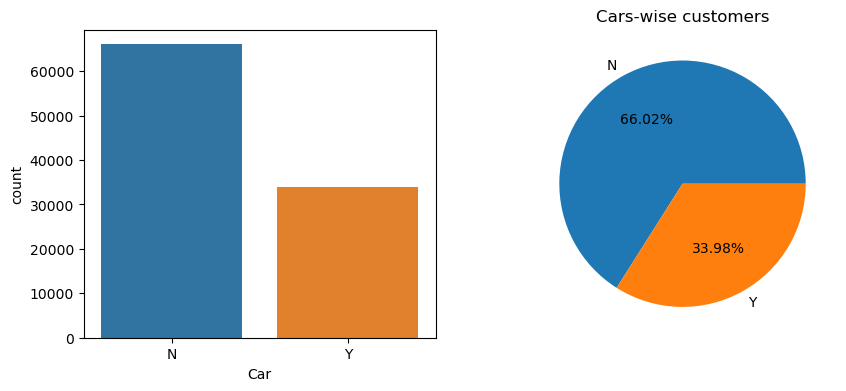

In [26]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sb.countplot(data=df,x='Car',ax=ax[0])
a=df['Car'].value_counts()
b=a.index
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title('Cars-wise customers');

conclusion:-66% of total customers are not having a car.

# Houses-wise customers

In [23]:
info_of_cat('House')

Unique values in House are: ['Y' 'N']
Mode values in House are: Y
Missing values in House: are 0


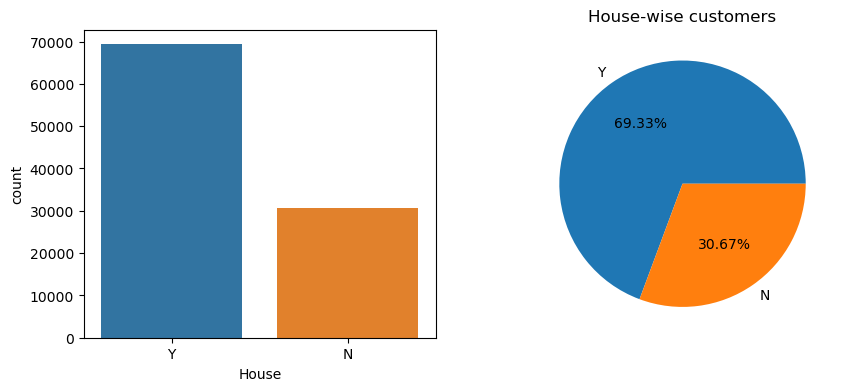

In [25]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sb.countplot(data=df,x='House',ax=ax[0])
a=df['House'].value_counts()
b=a.index
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title('House-wise customers');

conclusion:-69% of total customers are having a House.

# Count of Childrens

In [28]:
info_of_cat('CNT_CHILDREN')

Unique values in CNT_CHILDREN are: [ 0  1  2  3  4  7  5  6  8  9 11 12]
Mode values in CNT_CHILDREN are: 0
Missing values in CNT_CHILDREN: are 0


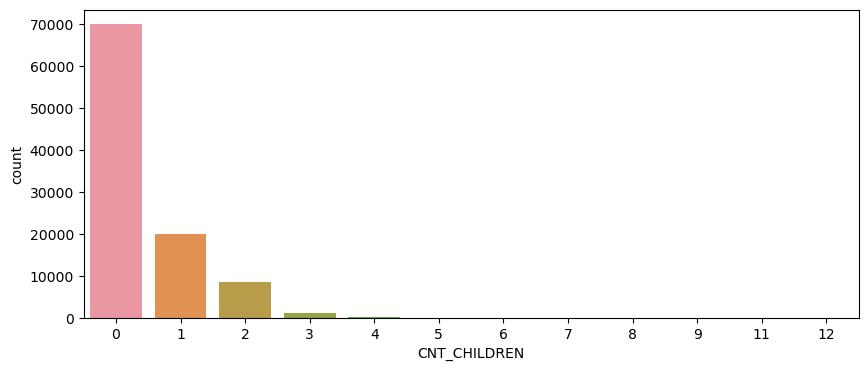

In [31]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x='CNT_CHILDREN');

conclusion:-70% of total customers are not having childerns.
2.20% of customers are having 1 one children.
3.10% of customers are having 2 childrens.

# Education of customers

In [32]:
info_of_cat('NAME_EDUCATION_TYPE')

Unique values in AMT_INCOME_TOTAL are: [202500.  270000.   67500.  ...  73759.5 133564.5 225112.5]
Mode values in AMT_INCOME_TOTAL are: 135000.0
Missing values in AMT_INCOME_TOTAL: are 0


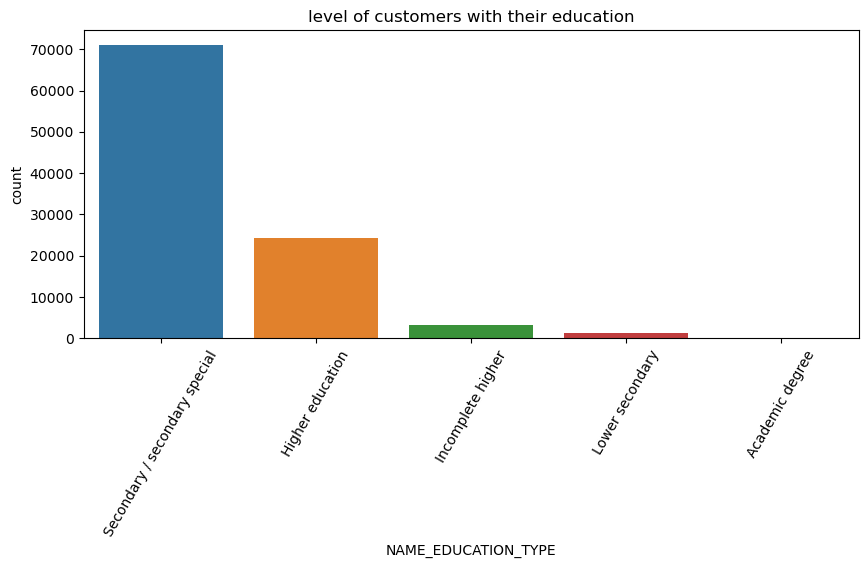

In [38]:
plt.figure(figsize=(10,4))
plt.title('level of customers with their education')
sb.countplot(data=df,x='NAME_EDUCATION_TYPE')
plt.xticks(rotation=60);

conclusion:-70% of total customers are qualification is secondry special.

# Family-Status of customers

In [39]:
info_of_cat('NAME_FAMILY_STATUS')

Unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode values in NAME_FAMILY_STATUS are: Married
Missing values in NAME_FAMILY_STATUS: are 0


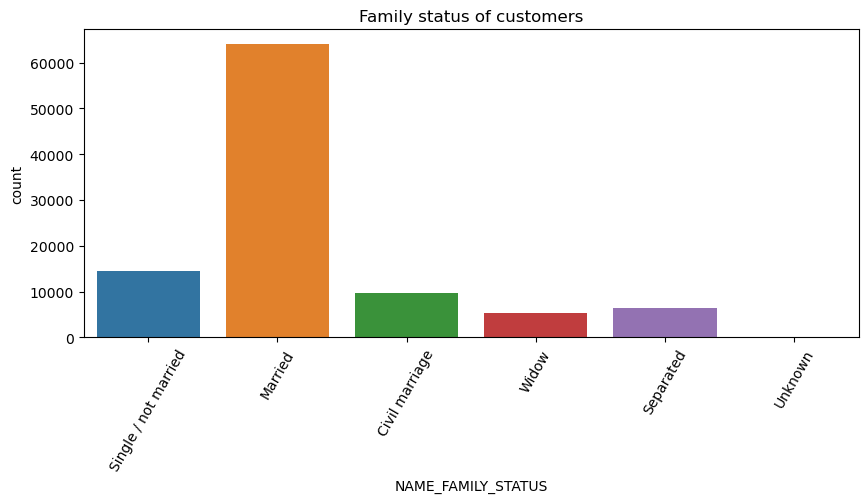

In [42]:
plt.figure(figsize=(10,4))
plt.title('Family status of customers')
sb.countplot(data=df,x='NAME_FAMILY_STATUS')
plt.xticks(rotation=60);

conclusion:-65% of total customers are married.
2.14% of total customers are singal/not married.

# Customers who are given mobile number or not

In [43]:
info_of_cat('MOBILE')

Unique values in MOBILE are: [1 0]
Mode values in MOBILE are: 1
Missing values in MOBILE: are 0


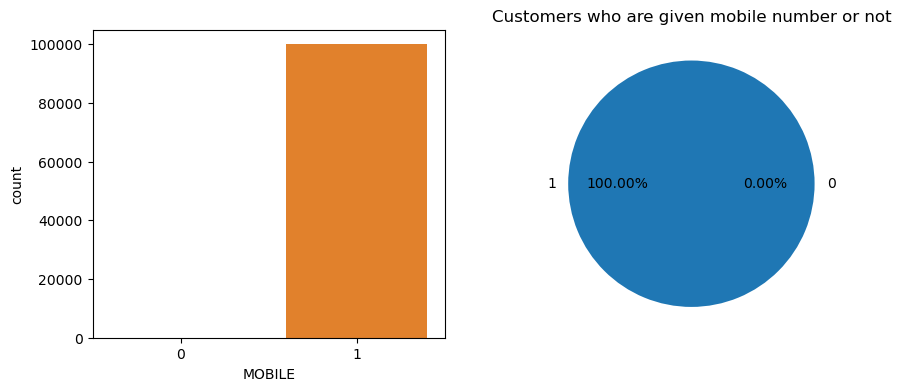

In [45]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sb.countplot(data=df,x='MOBILE',ax=ax[0])
a=df['MOBILE'].value_counts()
b=a.index
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title('Customers who are given mobile number or not');

conclusion:-100% of total customers are given their mobile numbers.

# Customers who are given work_phone number or not

In [51]:
info_of_cat('WORK_PHONE')

Unique values in WORK_PHONE are: [1 0]
Mode values in WORK_PHONE are: 1
Missing values in WORK_PHONE: are 0


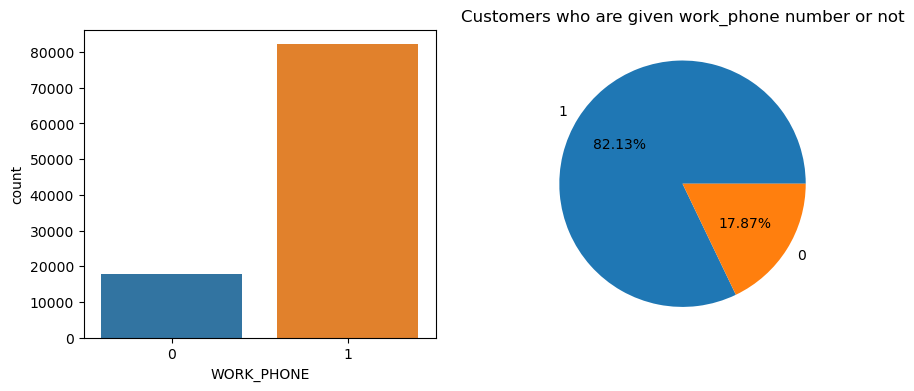

In [57]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sb.countplot(data=df,x='WORK_PHONE',ax=ax[0])
a=df['WORK_PHONE'].value_counts()
b=a.index
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title('Customers who are given work_phone number or not');

conclusion:-82% of total customers are given their work_phone numbers. 

# Customers who are given Home_phone number or not

In [58]:
info_of_cat('HOME_PHONE')

Unique values in HOME_PHONE are: [0 1]
Mode values in HOME_PHONE are: 0
Missing values in HOME_PHONE: are 0


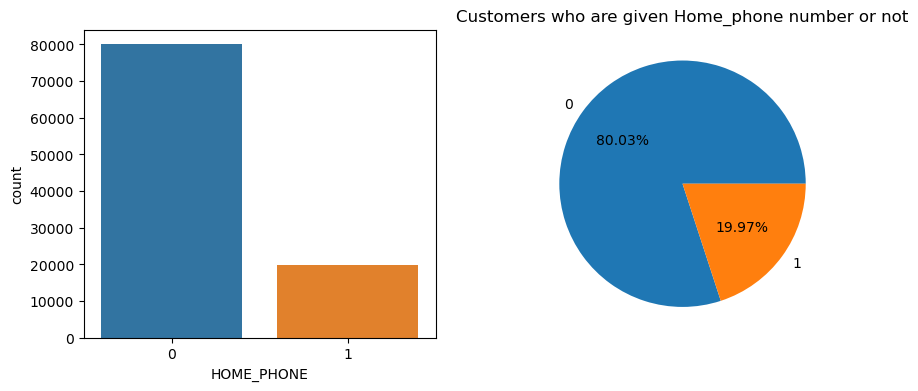

In [59]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sb.countplot(data=df,x='HOME_PHONE',ax=ax[0])
a=df['HOME_PHONE'].value_counts()
b=a.index
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title('Customers who are given Home_phone number or not');

conclusion:-80% of total customers are given their Home_phone numbers. 

# customer who's mobile number is reachable or not

In [60]:
info_of_cat('MOBILE_REACHABLE')

Unique values in MOBILE_REACHABLE are: [1 0]
Mode values in MOBILE_REACHABLE are: 1
Missing values in MOBILE_REACHABLE: are 0


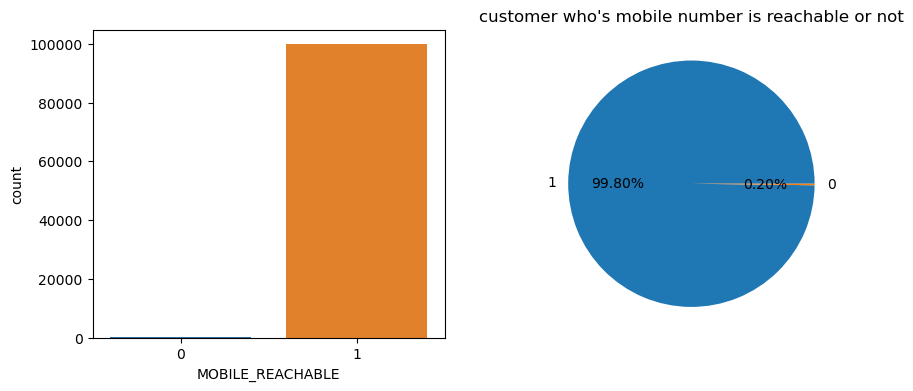

In [63]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sb.countplot(data=df,x='MOBILE_REACHABLE',ax=ax[0])
a=df['MOBILE_REACHABLE'].value_counts()
b=a.index
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title("customer who's mobile number is reachable or not");

conclusion:-Approx 100% of total customers are mobile reachable.

# Customers who provide Email or not

In [64]:
info_of_cat('FLAG_EMAIL')

Unique values in FLAG_EMAIL are: [0 1]
Mode values in FLAG_EMAIL are: 0
Missing values in FLAG_EMAIL: are 0


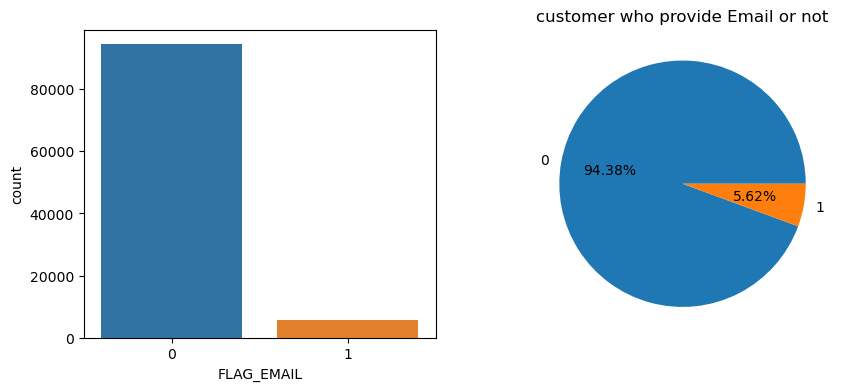

In [65]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sb.countplot(data=df,x='FLAG_EMAIL',ax=ax[0])
a=df['FLAG_EMAIL'].value_counts()
b=a.index
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title("customer who provide Email or not");

conclusion:-94.38% of total customers are provide their Email.

# Customers Occupation_type

In [66]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode values in OCCUPATION_TYPE are: Laborers
Missing values in OCCUPATION_TYPE: are 31224


In [67]:
occ_mode=df['OCCUPATION_TYPE'].mode()[0]
print(occ_mode)
df['OCCUPATION_TYPE'].fillna(occ_mode, inplace=True)

Laborers


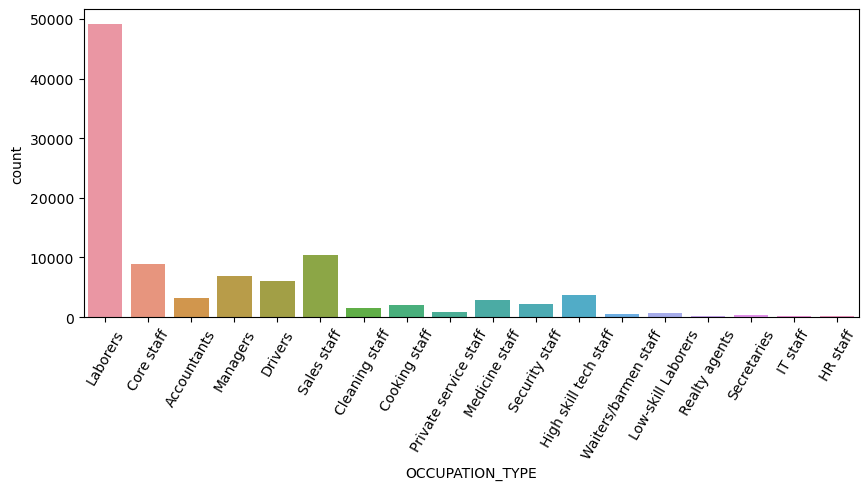

In [72]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x='OCCUPATION_TYPE')
plt.xticks(rotation=60);

conclusion:-49% of total customers are Labours.

# Count of Customers Family_Members

In [83]:
info_of_cat('CNT_FAM_MEMBERS')

Unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
Mode values in CNT_FAM_MEMBERS are: 2.0
Missing values in CNT_FAM_MEMBERS: are 1


In [84]:
fam_mode=df['CNT_FAM_MEMBERS'].mode()[0]
print(fam_mode)
df['CNT_FAM_MEMBERS'].fillna(fam_mode, inplace=True)


2.0


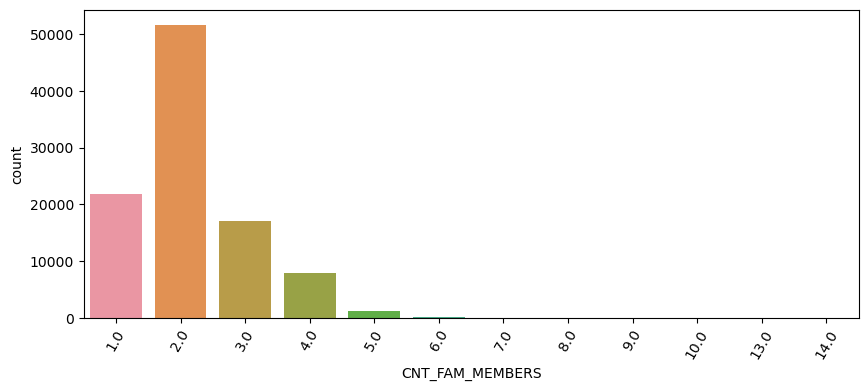

In [86]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x='CNT_FAM_MEMBERS')
plt.xticks(rotation=60);

conclusion:-52% of total customers are having 2 family members.

In [ ]:
# customer's loan application day

In [87]:
info_of_cat('APPLICATION_DAY')

Unique values in APPLICATION_DAY are: ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
Mode values in APPLICATION_DAY are: TUESDAY
Missing values in APPLICATION_DAY: are 0


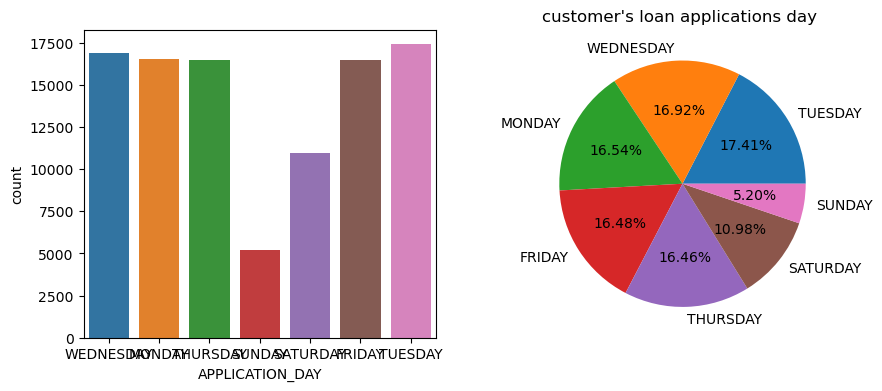

In [97]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sb.countplot(data=df,x='APPLICATION_DAY',ax=ax[0])
a=df['APPLICATION_DAY'].value_counts()
b=a.index
plt.pie(a,labels=b,autopct='%.2f%%')
plt.title("customer's loan applications day ");


conclusion:-Majority total customers loan application day is on tuesday(17.41%).

# Total no.of Documents submited by customers

In [98]:
info_of_cat('TOTAL_DOC_SUBMITTED')

Unique values in TOTAL_DOC_SUBMITTED are: [1 0 2 3 4]
Mode values in TOTAL_DOC_SUBMITTED are: 1
Missing values in TOTAL_DOC_SUBMITTED: are 0


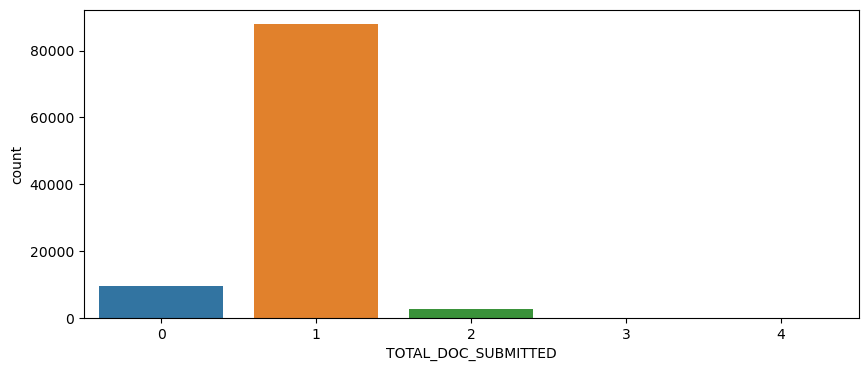

In [100]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x='TOTAL_DOC_SUBMITTED');

conclusion:-Approx 86% of total customers are providing only one document.

# Customer's Income

In [101]:
info_of_numerical('AMT_INCOME_TOTAL')

mean of the values in AMT_INCOME_TOTAL are: 169426.07027325002
median of the value in AMT_INCOME_TOTAL are: 144000.0
mode of the values in AMT_INCOME_TOTAL are: 135000.0
missing values in AMT_INCOME_TOTAL are: 0


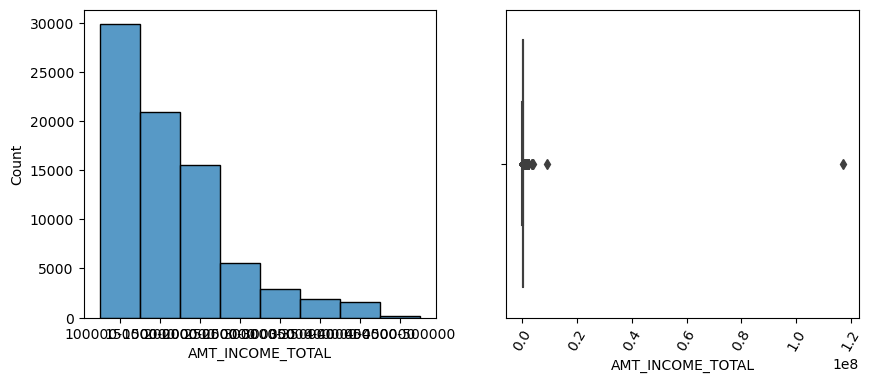

In [109]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
bins=[100000,150000,200000,250000,300000,350000,400000,450000,500000]
labels=['100000-150000','150000-200000','200000-250000','250000-300000','300000-350000','35000-400000','400000-450000','450000-500000']
x=pd.cut(x=df['AMT_INCOME_TOTAL'],bins=bins,labels=labels)
sb.histplot(x=x,ax=ax[0])
sb.boxplot(data=df,x='AMT_INCOME_TOTAL',ax=ax[1])
plt.xticks(rotation=60);

conclusion:-majority of total customers income is 1000-1500.

# customer's goods for which the loan is provided

In [111]:
info_of_numerical('AMT_GOODS_PRICE')

mean of the values in AMT_GOODS_PRICE are: 538345.1489706662
median of the value in AMT_GOODS_PRICE are: 450000.0
mode of the values in AMT_GOODS_PRICE are: 450000.0
missing values in AMT_GOODS_PRICE are: 81


<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

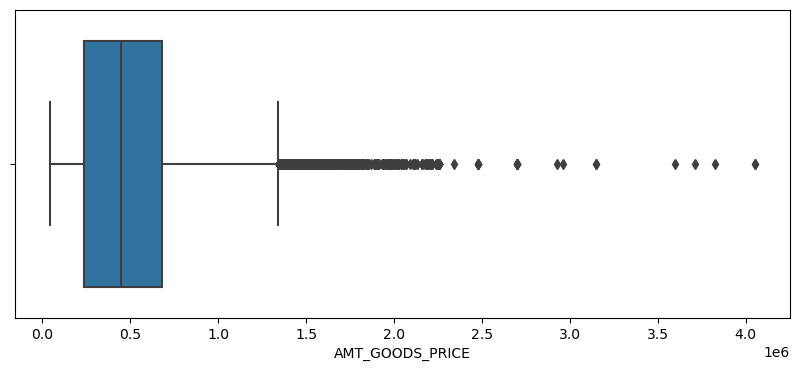

In [113]:
plt.figure(figsize=(10,4))
sb.boxplot(data=df,x='AMT_GOODS_PRICE')

conclusion:-75% of customers have applied loan for goods worth less then 675000.

# Bi-varient

<Figure size 1000x400 with 0 Axes>

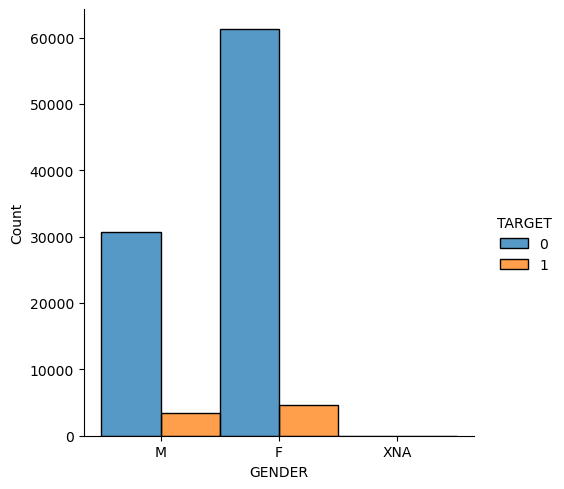

In [141]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='GENDER',hue='TARGET',multiple='dodge')

conclusion:-majority of female customers did not face any issue with the payment.

<Figure size 1000x400 with 0 Axes>

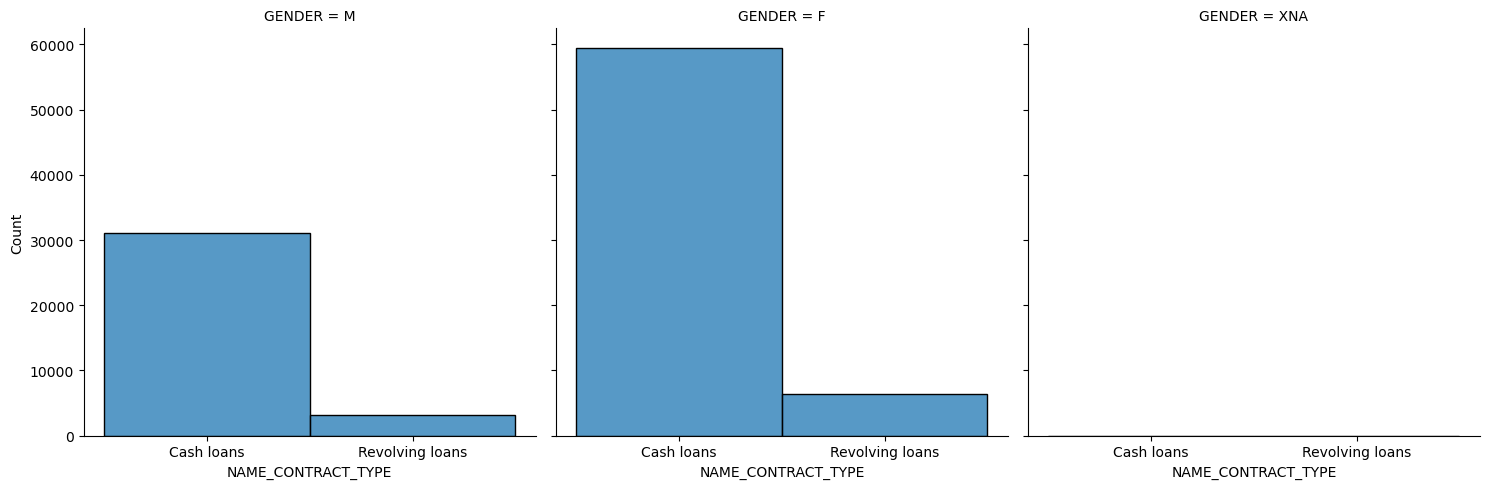

In [124]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='NAME_CONTRACT_TYPE',col='GENDER')

conclusion:- majority of Female customers are having the cash loans as coampre to male customers.

<Figure size 1000x400 with 0 Axes>

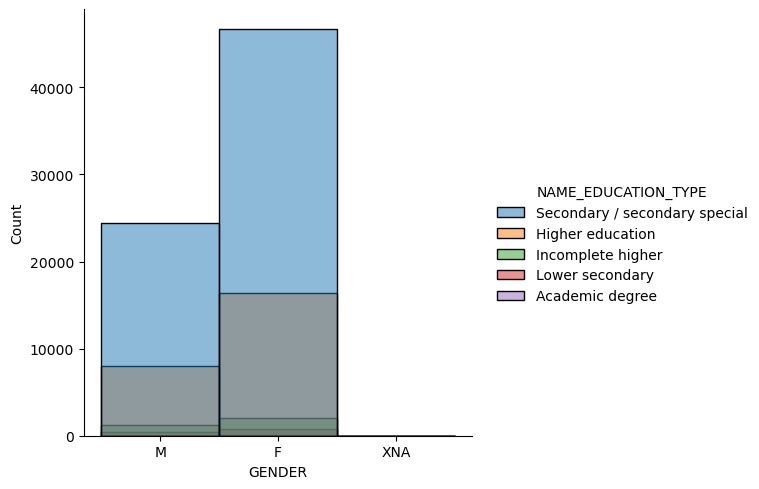

In [142]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='GENDER',hue='NAME_EDUCATION_TYPE')

conclusion:-comapre to female customers the male customers are low in educations.

<Figure size 1000x400 with 0 Axes>

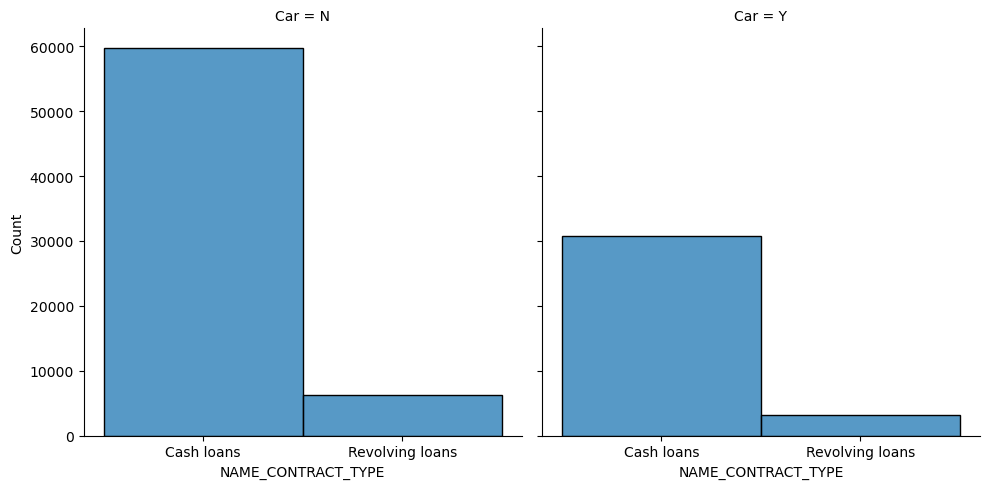

In [133]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='NAME_CONTRACT_TYPE',col='Car')

conclusion:-more no.of customers are taken cash loan with the no cars.

<Figure size 1000x400 with 0 Axes>

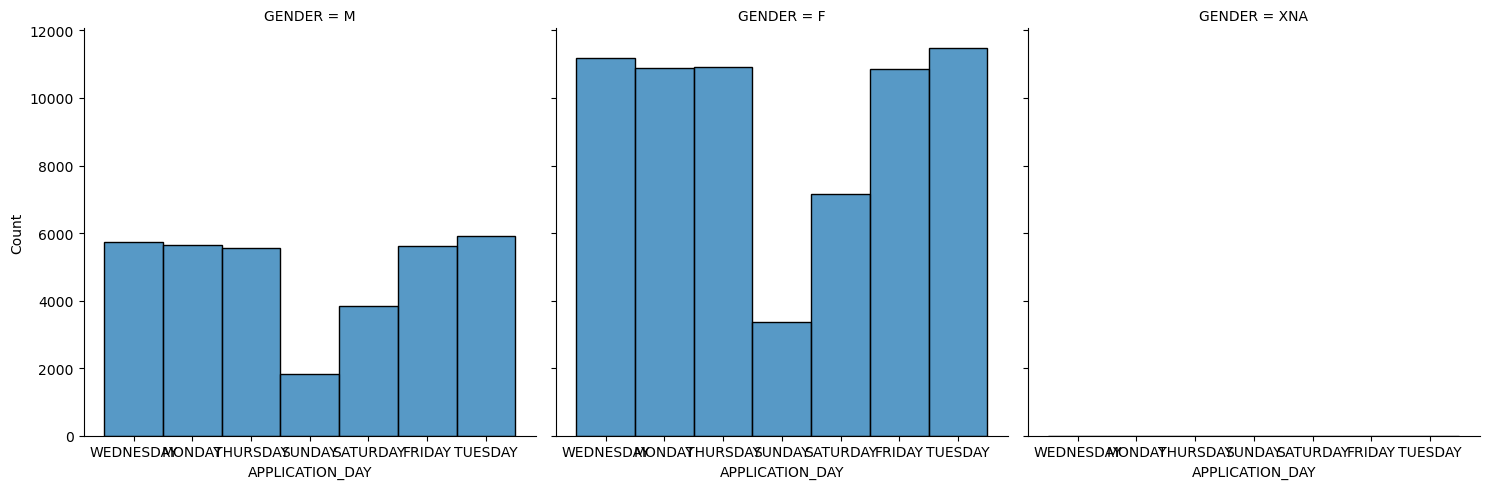

In [135]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='APPLICATION_DAY',col='GENDER')

conclusion:-majority of female customers are with application day.

<Figure size 1000x400 with 0 Axes>

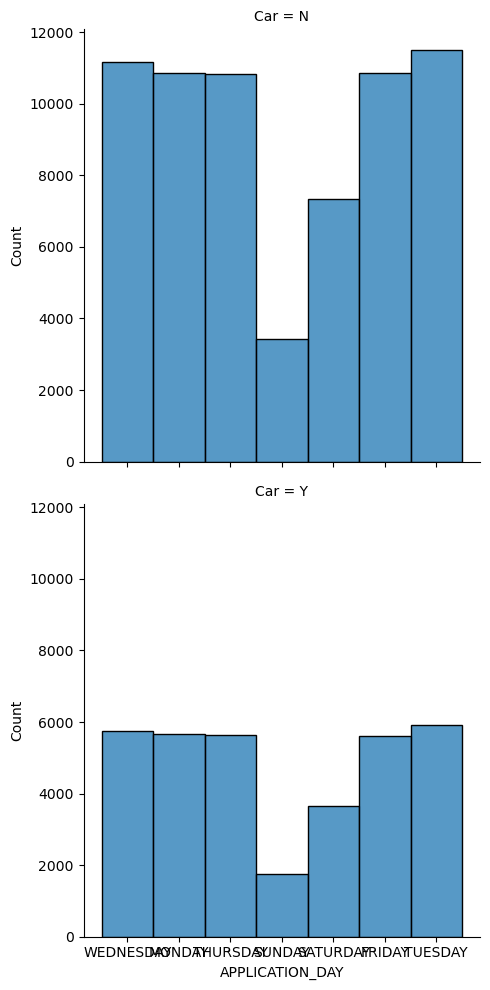

In [10]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='APPLICATION_DAY',row='Car')

conclusion:-There is no application day for cars.

<Figure size 1000x400 with 0 Axes>

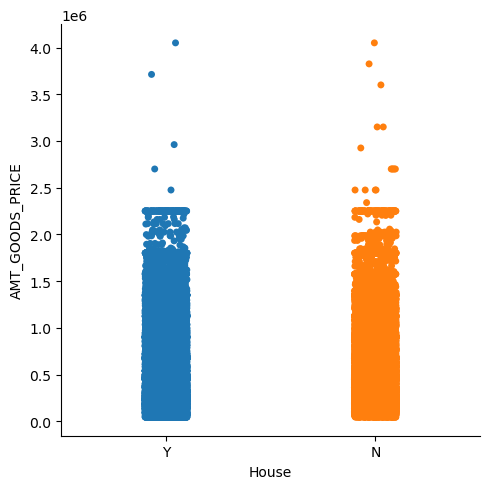

In [151]:
plt.figure(figsize=(10,4))
sb.catplot(data=df,x='House',y='AMT_GOODS_PRICE',kind='strip')

# Multi-varient

<Figure size 1000x400 with 0 Axes>

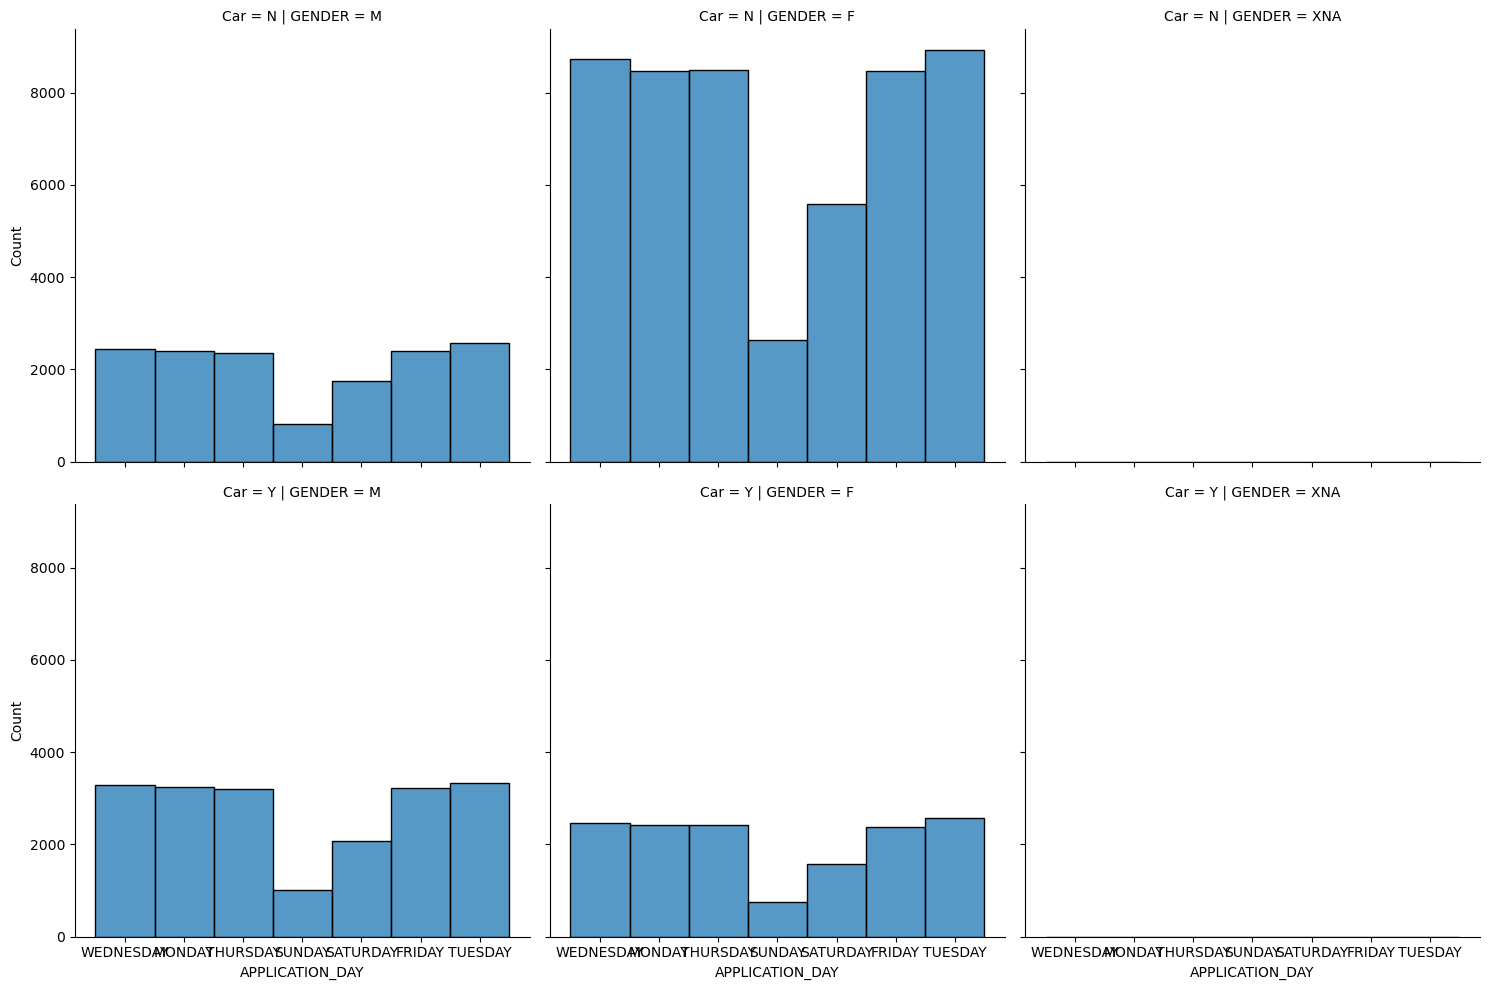

In [9]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='APPLICATION_DAY',row='Car',col='GENDER')

conclusion:-Female customers are not having the cars as comapre to male customers.

<Figure size 1000x400 with 0 Axes>

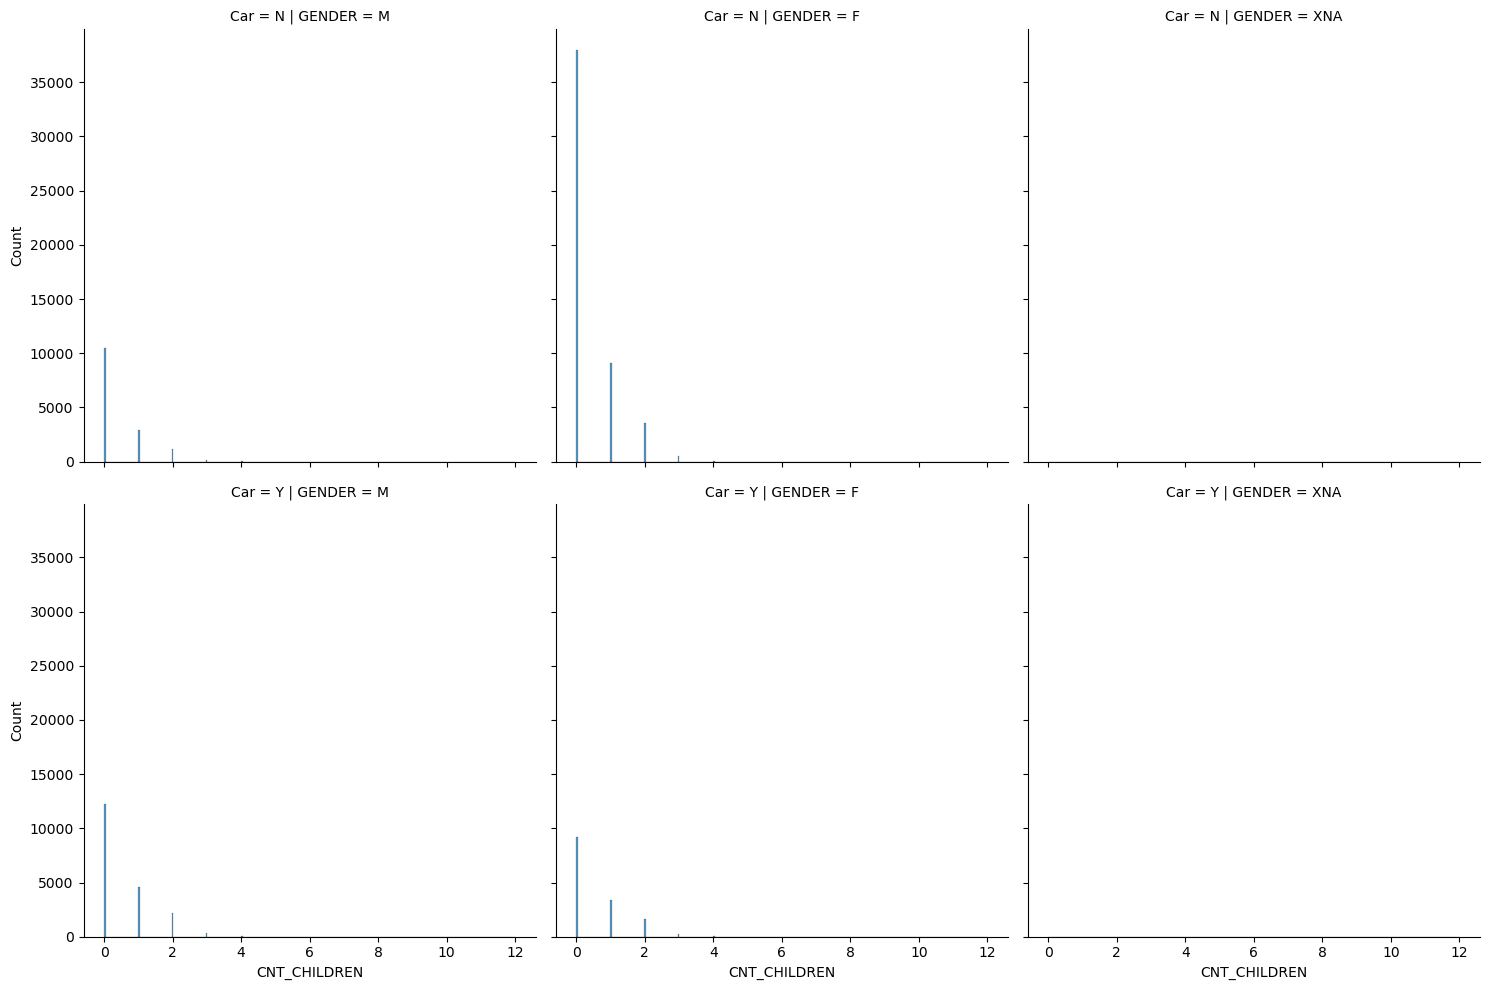

In [20]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='CNT_CHILDREN',row='Car',col='GENDER',kind='hist')

conclusion:-majority of female customers are having the childrens and cars.

<Figure size 1000x400 with 0 Axes>

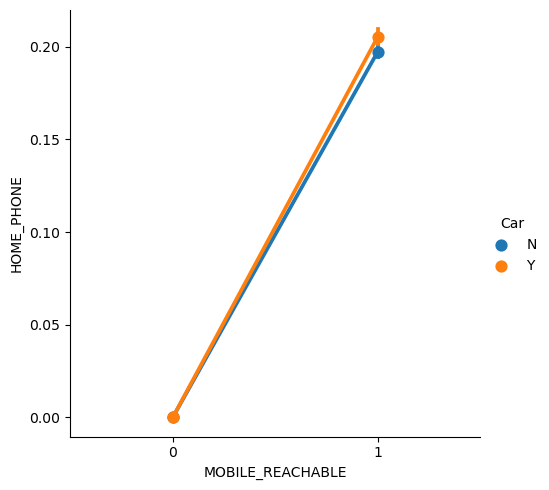

In [24]:
plt.figure(figsize=(10,4))
sb.catplot(data=df,x='MOBILE_REACHABLE',y='HOME_PHONE',hue='Car',kind='point')

conclusion:-majority of customers are having mobile reachable.

<Figure size 1000x400 with 0 Axes>

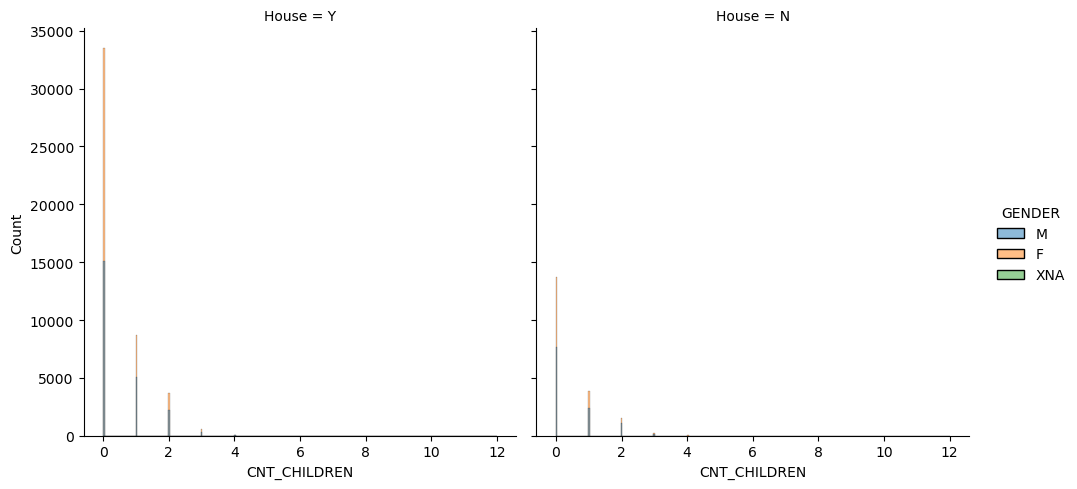

In [33]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='CNT_CHILDREN',col='House',hue='GENDER')

<Figure size 1000x400 with 0 Axes>

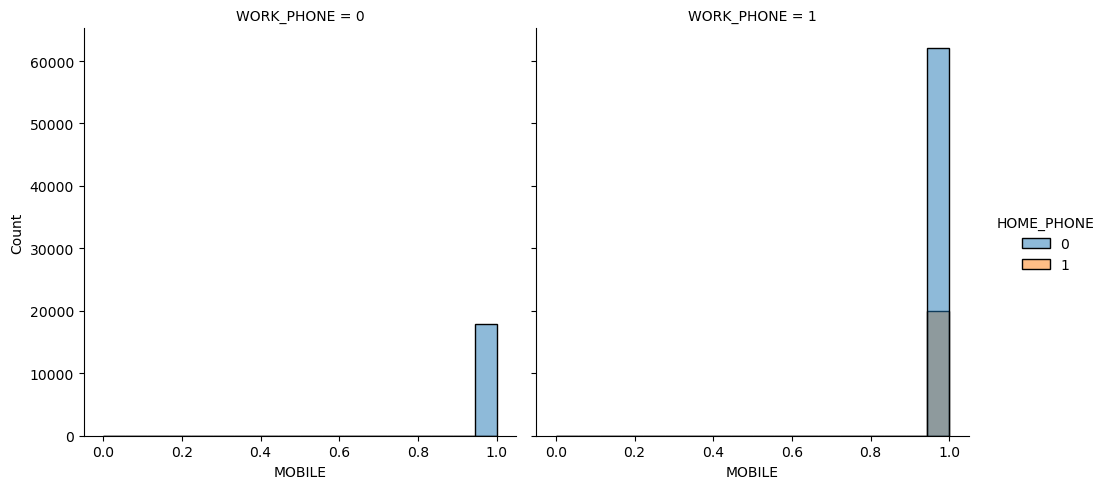

In [41]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='MOBILE',col='WORK_PHONE',hue='HOME_PHONE')

conclusion:- more no.of customers are having the work_phone.